Громыко Артём Артурович Б9122-02.03.01сцт

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def gen_matrix(n):
    """
    Генератор симметричной положительно определенной матрицы
    """
    A = np.random.rand(n, n)
    A = (A + A.T) / 2
    A = A + 2 * n * np.eye(n)
    return A

In [29]:
def norm(x):
    return np.sqrt(sum([x[i] ** 2 for i in range(len(x))]))

In [30]:
def solve_iterate(A, eps): 
    """
    Метод простых итераций
    """

    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    index = 0

    v_k = np.random.rand(n)

    lambda_old = 0

    while True:
        v_k1 = np.dot(A, v_k)
        
        v_k1_norm = np.linalg.norm(v_k1)
        v_k = v_k1 / v_k1_norm
        
        lambda_k = np.dot(v_k.T, np.dot(A, v_k))

        index += 1

        if abs(lambda_k - lambda_old) < eps:
            break
        lambda_old = lambda_k

    return lambda_k, index

In [31]:
def solve_rotate(A, epsilon): 
    """
    Метод вращений Якоби
    """

    def max_element(A):
        max_val = 0
        max_i = 0
        max_j = 0
        for i in range(1, n):
            for j in range(i):
                if A[i, j] > max_val:
                    max_val = A[i, j]
                    max_i = i
                    max_j = j
        return max_i, max_j
    
    def sum_non_diag(A):
        result = 0
        n = A.shape[0]
        for i in range(n):
            for j in range(n):
                if i != j:
                    result += A[i, j] ** 2
        return result

    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    index = 0

    while True:

        i, j = max_element(np.abs(A))

        if A[i, i] == A[j, j]:
            phi = np.pi / 2
        else:
            phi = np.arctan((2 * A[i, j]) / (A[i, i] - A[j, j])) / 2

        G = np.eye(n)
        G[i, i] = G[j, j] = np.cos(phi)
        G[i, j] = np.sin(phi)
        G[j, i] = -G[i, j]

        A = G.T @ A @ G

        if sum_non_diag(A) < epsilon:
            return [A[i, i] for i in range(n)], index

In [32]:
def solve_rotate(A, eps=1e-10):
    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    index = 0
    
    while True:
        p, q = np.unravel_index(np.argmax(np.abs(A - np.diag(np.diagonal(A)))), A.shape)

        if np.sum(A ** 2) - np.sum(np.diag(A ** 2)) < eps:
            break

        if A[p, p] == A[q, q]:
            theta = np.pi / 4 
        else:
            theta = np.arctan2(2 * A[p, q], A[q, q] - A[p, p]) / 2

        c = np.cos(theta)
        s = np.sin(theta)

        A_pp = A[p, p]
        A_qq = A[q, q]
        A_pq = A[p, q]

        A[p, p] = c * c * A_pp - 2 * c * s * A_pq + s * s * A_qq
        A[q, q] = s * s * A_pp + 2 * c * s * A_pq + c * c * A_qq
        A[p, q] = 0 
        A[q, p] = 0 

        for r in range(n):
            if r != p and r != q:
                A_pr = A[p, r]
                A_qr = A[q, r]
                A[p, r] = c * A_pr - s * A_qr
                A[q, r] = s * A_pr + c * A_qr
                A[r, p] = A[p, r] 
                A[r, q] = A[q, r]

        index += 1

    return np.diagonal(A), index

In [33]:
matrixes = [gen_matrix(3), gen_matrix(5), gen_matrix(7)]
epsilons = [10 ** (-3), 10 ** (-7)]

In [34]:
rotate_data, iter_data = [[], []], [[], []]

for index, eps in enumerate(epsilons):
    for A in matrixes:
        print(f'{A=}\n')

        x, index_iterate = solve_iterate(A, eps)
        print(f'Метод простых итераций сошелся с точностью {eps} за {index_iterate} итераций\nРешение: {np.round(x, 4)}\n')

        result, index_rotate = solve_rotate(A, eps)
        print(f'Метод вращений Якоби сошелся с точностью {eps} за {index_rotate} итераций\nРешение: {np.round(np.sort(result), 4)}\n')

        print(f'Реальные собственные значения:\n {np.round(np.sort(np.linalg.eig(A).eigenvalues), 4)}')

        print('\n' + 40 * '-=' + '-\n')

        rotate_data[index].append(index_rotate)
        iter_data[index].append(index_iterate)

A=array([[6.22655762, 0.46677243, 0.58971513],
       [0.46677243, 6.64374036, 0.86846117],
       [0.58971513, 0.86846117, 6.91250897]])

Метод простых итераций сошелся с точностью 0.001 за 7 итераций
Решение: 7.9783

Метод вращений Якоби сошелся с точностью 0.001 за 3 итераций
Решение: [5.8747 5.9289 7.9792]

Реальные собственные значения:
 [5.8747 5.9289 7.9792]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

A=array([[10.07412687,  0.226277  ,  0.67786407,  0.5591909 ,  0.90328706],
       [ 0.226277  , 10.42276471,  0.36184807,  0.52247024,  0.82783681],
       [ 0.67786407,  0.36184807, 10.3956753 ,  0.53524623,  0.85402   ],
       [ 0.5591909 ,  0.52247024,  0.53524623, 10.64328774,  0.53677837],
       [ 0.90328706,  0.82783681,  0.85402   ,  0.53677837, 10.4629399 ]])

Метод простых итераций сошелся с точностью 0.001 за 12 итераций
Решение: 12.8547

Метод вращений Якоби сошелся с точностью 0.001 за 13 итераций
Решение: [ 9.1836  9.6114 10.1

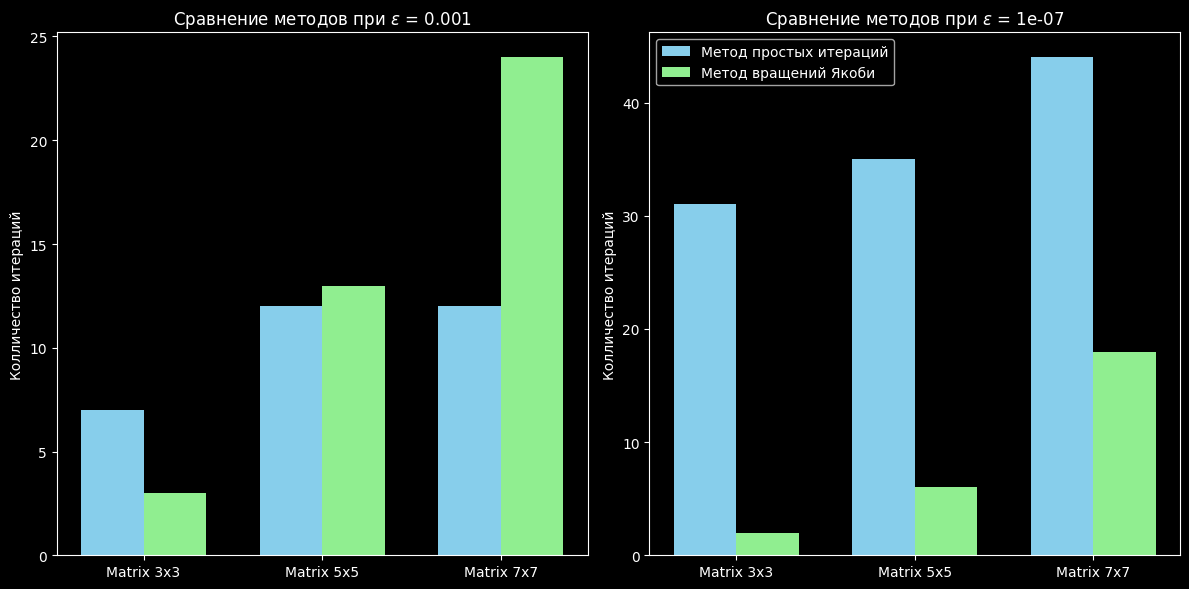

In [35]:
plt.figure(figsize=(12, 6))
    
for i in range(len(epsilons)):

    n = len(matrixes)
    x = np.arange(n)
    width = 0.35

    plt.subplot(1, 2, i + 1)

    plt.title(f'Сравнение методов при $\\epsilon$ = {epsilons[i]}')

    plt.bar(x - width / 2, iter_data[i], width, color='skyblue', label='Метод простых итераций')

    plt.bar(x + width / 2, rotate_data[i], width, color='lightgreen', label='Метод вращений Якоби')

    plt.ylabel('Колличество итераций')

    plt.xticks(x, [f'Matrix {2 * i + 3}х{2 * i + 3}' for i in range(n)])

plt.legend()

plt.tight_layout()

plt.show()

Метод простых итераций менее требователен к матрице и способен быстро найти максимальное собственное значение даже больших матиц с небольшой точностью.

Для симметричных положительно определенных матриц при высокой точности или при необходимости поиска всех собственных значений более подходящим является метод вращений Якоби.